
Epoch 1: val_loss improved from inf to 0.08470, saving model to ./data\MNIST_CNN.hdf5

Epoch 2: val_loss improved from 0.08470 to 0.05832, saving model to ./data\MNIST_CNN.hdf5

Epoch 3: val_loss improved from 0.05832 to 0.05166, saving model to ./data\MNIST_CNN.hdf5

Epoch 4: val_loss improved from 0.05166 to 0.04676, saving model to ./data\MNIST_CNN.hdf5

Epoch 5: val_loss improved from 0.04676 to 0.04046, saving model to ./data\MNIST_CNN.hdf5

Epoch 6: val_loss did not improve from 0.04046

Epoch 7: val_loss did not improve from 0.04046

Epoch 8: val_loss improved from 0.04046 to 0.03969, saving model to ./data\MNIST_CNN.hdf5

Epoch 9: val_loss improved from 0.03969 to 0.03829, saving model to ./data\MNIST_CNN.hdf5

Epoch 10: val_loss did not improve from 0.03829

Epoch 11: val_loss did not improve from 0.03829

Epoch 12: val_loss did not improve from 0.03829

Epoch 13: val_loss did not improve from 0.03829

Epoch 14: val_loss did not improve from 0.03829

Epoch 15: val_loss did no

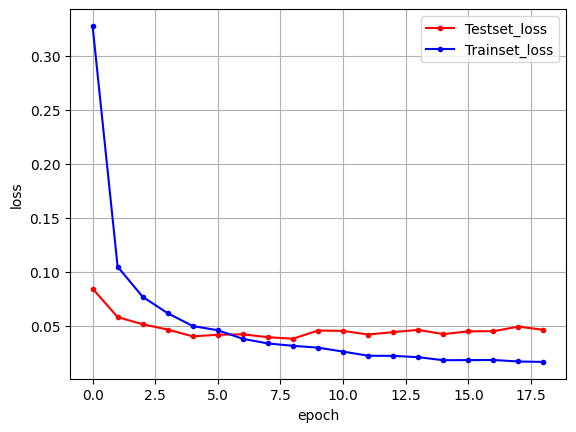

In [3]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Dropout,MaxPooling2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.datasets import mnist
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import os


# 데이터 불러오기

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28,28,1).astype('float32')/255
x_test = x_test.reshape(x_test.shape[0],28,28,1).astype('float32')/366
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# 컨볼루션 신경망 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1),  activation='relu'))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

#모델 실행 옵션 설정
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#모델 최적화를 위한 설정
modelpath = './data/MNIST_CNN.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, moniter='val_loss', verbose=1, save_best_only=True)
early_stopping_callback= EarlyStopping(monitor='val_loss', patience=10)

# 모델 실행
history = model.fit(x_train, y_train, validation_split=0.25, epochs=30, batch_size=200, verbose=0,
                    callbacks=[early_stopping_callback, checkpointer])

#테스트 정확도 출력

print('\n Test Accuracy: %.4f'%(model.evaluate(x_test, y_test)[1]))

# 검증 세트와 학습 세트의 오차 저장
y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label = 'Trainset_loss')

#그래프에 그리드 부여, 레이블 표시
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()